Mean ROC-AUC: 0.9764198262855489 (95% CI: 0.9721711524095022, 0.9806685001615956)
Mean PR-AUC: 0.46874840250403627 (95% CI: 0.46147166138699697, 0.47602514362107556)
Mean F1 Score: 0.923588787021783 (95% CI: 0.9167846027906058, 0.9303929712529603)
Mean Matthews Correlation Coefficient: 0.8447693188740699 (95% CI: 0.8307730022197002, 0.8587656355284397)


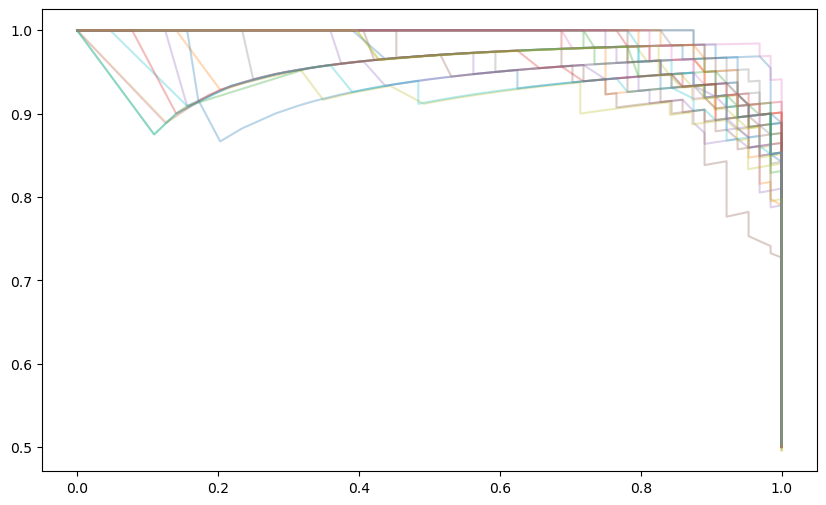

NameError: name 'X_test' is not defined

NameError: name 'X_test' is not defined

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import StandardScaler

#load the shap values from the RandomForest model
%run RandomForestShap.ipynb

# Step 2: Convert to 2D matrix using average across classes
shap_values_avg = np.mean(shap_values, axis=2)  # shape: (n_samples, n_features)

# Step 3: Normalize SHAP values (optional but helps clustering)
scaler = StandardScaler()
shap_scaled = scaler.fit_transform(shap_values_avg)

# Step 4: Perform hierarchical clustering
linked = linkage(shap_scaled, method="ward")

# Step 5: Assign cluster labels
num_clusters = 4  # You can change this number based on your use case
cluster_labels = fcluster(linked, t=num_clusters, criterion='maxclust')

# Step 6: Create DataFrame for visualization (optional)
shap_df = pd.DataFrame(shap_scaled, columns=[f"feature_{i}" for i in range(shap_scaled.shape[1])])
shap_df["cluster"] = cluster_labels

# Step 7: Visualize cluster distribution (optional)
sns.pairplot(shap_df, hue="cluster", palette="tab10", corner=True)
plt.suptitle("SHAP Value Clusters", y=1.02)
plt.show()

# Step 8: Optional dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode="lastp", p=num_clusters, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title("Dendrogram of SHAP Clustering")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Optional: Add cluster labels back to original dataset
# original_df["shap_cluster"] = cluster_labels
